In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np 
import torch.optim as optim 
import sys 
import os 
import matplotlib.pyplot as plt

In [2]:
project_basedir=os.path.join('..','..')
project_basedir = os.path.abspath(project_basedir)
sys.path.insert(0,project_basedir)

In [3]:
from  tests.core.np import LinearModel 
model_w = np.array([[1, 3, -1], [0, -4, 2]])
model_b = np.array([[-3, 2]]).reshape((model_w.shape[0], 1))
model = LinearModel(model_w, model_b)

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.dense = nn.Linear(3,2) 

    def forward(self, x):
        return self.dense(x) 

In [23]:
net = Net() 
net_w = np.array([[-1, -3, 1], [0, 4, -2]])
net_b = np.array([3, -2])
w_tensor = torch.from_numpy(net_w).float()
b_tensor = torch.from_numpy(net_b).float() 
w = nn.Parameter(w_tensor)
b = nn.Parameter(b_tensor)
net.dense.weight  = w 
net.dense.bias = b

In [24]:
input = torch.FloatTensor([[1, -1, 0]])
output = net(input)
target = torch.FloatTensor([[.5, .7]])
target = target.view(1, -1)
criteria = nn.MSELoss()
loss = criteria(output, target)
optimizer = torch.optim.SGD(net.parameters(), lr=.01)

In [25]:
epoch = 0 
losses = [] 
av = [] 
x_axis=[] 
x_losses = [] 
for x,y in model.data(40000,8):
    # Forward Propagation
    pyx = torch.from_numpy(x.T).float() 
    pyy = torch.from_numpy(y.T).float()
    y_pred = net(pyx)
    # Compute and print loss
    loss = criteria(y_pred, pyy)
    losses.append(loss.item()) 
    
    if epoch % 1 == 0 :
        x_axis.append(epoch)
        x_losses.append(loss.item())
        
    if epoch %1000 == 0 :
        last_100 = losses[-100:]
        average_l100 = sum(last_100) / len(last_100)
        av.append([epoch, average_l100])
        print('epoch: ', epoch,' loss: ', loss.item())
    # Zero the gradients
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    epoch+=1
    
last_100 = losses[-100:]
average_l100 = sum(last_100) / len(last_100)
av.append([epoch, average_l100])
print("Final loss:{}".format(loss))
    
print('epoch: ', epoch,' loss: ', loss.item())

epoch:  0  loss:  19.50882911682129
epoch:  1000  loss:  1.425842523574829
epoch:  2000  loss:  0.3223493993282318
epoch:  3000  loss:  0.15377523005008698
epoch:  4000  loss:  0.026918988674879074
epoch:  5000  loss:  0.013967498205602169
epoch:  6000  loss:  0.009595238603651524
epoch:  7000  loss:  0.0013685618760064244
epoch:  8000  loss:  0.0005662787589244545
epoch:  9000  loss:  0.0001542641402920708
epoch:  10000  loss:  5.7384495448786765e-05
epoch:  11000  loss:  9.689624130260199e-05
epoch:  12000  loss:  3.110897887381725e-05
epoch:  13000  loss:  9.572576345817652e-06
epoch:  14000  loss:  1.207827608595835e-06
epoch:  15000  loss:  1.1003752575788894e-07
epoch:  16000  loss:  6.292257808127033e-07
epoch:  17000  loss:  1.3700341128242144e-07
epoch:  18000  loss:  4.614106785538752e-08
epoch:  19000  loss:  2.981419910952354e-08
epoch:  20000  loss:  9.657536104157316e-09
epoch:  21000  loss:  2.481911121066105e-09
epoch:  22000  loss:  1.2514409508668223e-09
epoch:  23000

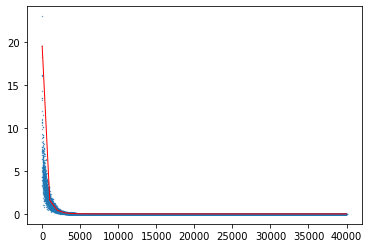

In [26]:
plt.scatter(x_axis, x_losses, s=.1)
av_np = np.array(av)
plt.plot(av_np[:,0], av_np[:,1], linewidth=1, c='r')
plt.show()

In [27]:
print(net.dense.weight.data)
print("------------")
print(net.dense.bias.data)

tensor([[ 1.0000e+00,  3.0000e+00, -1.0000e+00],
        [ 2.0809e-07, -4.0000e+00,  2.0000e+00]])
------------
tensor([-3.0000,  2.0000])
